---

# <center>★ AI / ML Project - MNIST Digits Project★
#### <center> ***Domain: Computer Vision***

---

### Description:

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.


### Acknowledgement: 
The dataset is referred from Kaggle Datasets.

### Objective:
- Understand the Dataset & perform necessary Preprocessing.
- Design a Neural Network Architecture to classify the Digit Images.
- Also evaluate the model performance & compare their Accuracy, Precsison, Recall, F1, etc.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Predictive Modelling
4. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [225]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import tensorflow as tf
import tensorflow_datasets as tfds

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [209]:
#Loading the dataset

(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, 
                                         as_supervised=True, with_info=True)

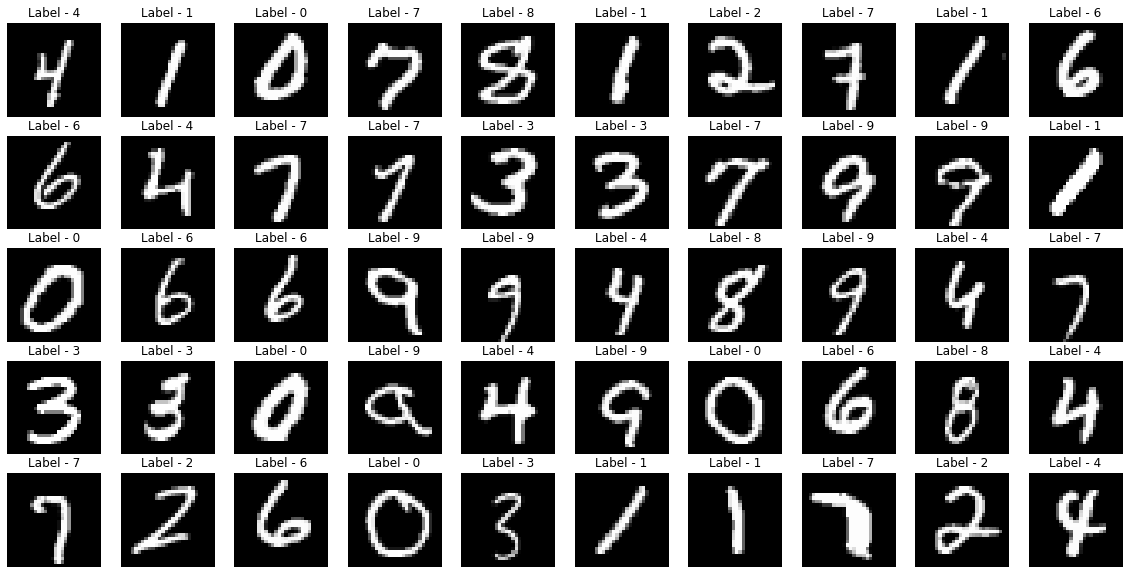

In [180]:
#Visualising te images

n=50
x = np.concatenate([x for x, y in ds_train.take(n)], axis=0)
y = [y.numpy() for x, y in ds_train.take(n)]

plt.figure(figsize=[20,10])
for e,i in enumerate(x.reshape(n,28,28,1)):
    plt.subplot(math.ceil(n/10),10,e+1)
    plt.title("Label - {}".format(y[e]))
    plt.imshow(i, cmap='gray')
    plt.axis('off')
plt.show()

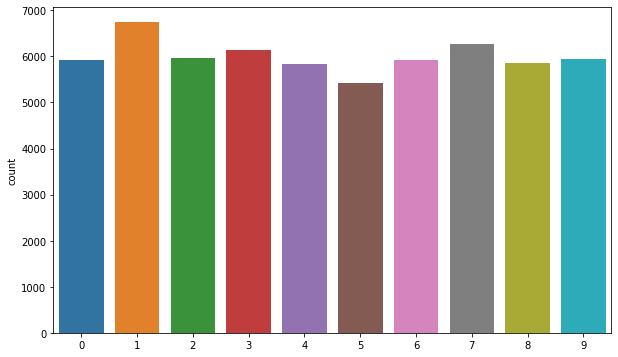

In [227]:
#Checking the Label Distribution

y_count = [y.numpy() for x, y in ds_train]
sns.countplot(y_count)
plt.show()

---

# <center>2. Data Preprocessing

In [181]:
#Defining a custom function to normalise the images

def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

In [182]:
#Preprocessing training dataset

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [183]:
#Preprocessing testing dataset

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

---

# <center>3. Predictive Modelling

In [194]:
#Building Deep Learning Model Architecture

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [195]:
#Compiling the Model

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [196]:
#Training the Model

n=25
history = model.fit(
                    ds_train,
                    epochs=n,
                    validation_data=ds_test,
                )

Epoch 1/25
469/469 [==============================] - 3s 5ms/step - loss: 0.3596 - sparse_categorical_accuracy: 0.9011 - val_loss: 0.1949 - val_sparse_categorical_accuracy: 0.9431
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1676 - sparse_categorical_accuracy: 0.9518 - val_loss: 0.1434 - val_sparse_categorical_accuracy: 0.9581
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1222 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.1165 - val_sparse_categorical_accuracy: 0.9644
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0946 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.0984 - val_sparse_categorical_accuracy: 0.9695
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.0916 - val_sparse_categorical_accuracy: 0.9711
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0631 - sparse_categorica

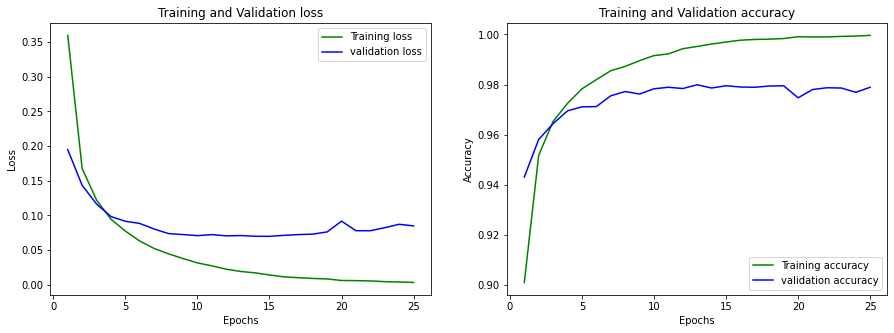

In [208]:

acc_train = history.history['sparse_categorical_accuracy']
acc_val = history.history['val_sparse_categorical_accuracy']

loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n+1)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

# <center>4. Outcomes & Project Conclusion

### Here are some of the key outcomes of the project:
- The  Image Dataset was large enough with 60k training samples & 10k testing samples.
- Visualising the image samples & it's distribution, helped us to get some insights into the dataset.
- The classes were not imbalanced, hence we did not perform data augmentation.
- The performance of basic Vanilla Neural Network Architecture was pretty good, as the results obtained had 99.9% of Training Accuracy & 97.8% of Testing Accuracy.
- Further improvisations can include the usage of CNN layers, adding dropouts & batch-normalization layers, or even utilizing the Transfer Learning Methodology to train Prominent Models like VGG, ResNet, AlexNet, GoogleNet, Etc.

In [229]:
#<<<--------------------------------------THE END---------------------------------------->>>